# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
Mar22 = pd.read_csv("./202203.csv", encoding='latin-1')
Apr22 = pd.read_csv("./202204.csv", encoding='latin-1')
Jun22 = pd.read_csv("./202206.csv", encoding='latin-1')
Jul22 = pd.read_csv("./202207.csv", encoding='latin-1')
Aug22 = pd.read_csv("./202208.csv", encoding='latin-1')
Sep22 = pd.read_csv("./202209.csv", encoding='latin-1')
Oct22 = pd.read_csv("./202210.csv", encoding='latin-1')
Jan23 = pd.read_csv("./202301.csv", encoding='latin-1')
Feb23 = pd.read_csv("./202302.csv", encoding='latin-1')
Mar23 = pd.read_csv("./202303.csv", encoding='latin-1')
Apr23 = pd.read_csv("./202304.csv", encoding='latin-1')
May23 = pd.read_csv("./202305.csv", encoding='latin-1')
Jun23 = pd.read_csv("./202306.csv", encoding='latin-1')
Jul23 = pd.read_csv("./202307.csv", encoding='latin-1')
Aug23 = pd.read_csv("./202308.csv", encoding='latin-1')
Sep23 = pd.read_csv("./202309.csv", encoding='latin-1')


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [6]:
# Here first I will merge all of the data sets into one dataframe, so that EDA and cleanup is much easier to run, and only needs to be run once. Since my csvs contain the same columns here I can just use the concat function.

datasets = [Mar22, Apr22, Jun22, Jul22, Aug22, Sep22, Oct22, Jan23, Feb23, Mar23, Apr23, May23, Jun23, Jul23, Aug23, Sep23]
df = pd.concat(datasets)

In [7]:
# Check to make sure it worked out
print(df.columns)

# No duplicated rows
df.duplicated().sum()

Index(['Unnamed: 0', 'id', 'kw_location', 'time_location', 'created_date',
       'period', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', 'year', 'month'],
      dtype='object')


np.int64(0)

In [ ]:
# Now I can begin analyzing the data based on a variety of relations, in order to determine its flexibility for use in analysis

#Top 1 keywords globally all time, descending.
col1cnt = df['1'].value_counts()
col1cnt[df['1']].sort_values(ascending=False)

#Top 1 keywords globally in January 2023, descending.
col1jan = (df[df['month'] == 1]['1'])
col1cnt = col1jan.value_counts()
col1cnt.sort_values(ascending=False)

#Top 1 keywords in US, January 2023, descending.
col1janUS = (df[df[df['month'] == 1]['kw_location'] == 'US']['1'])
col1cnt = col1janUS.value_counts()
col1cnt.sort_values(ascending=False)

C:\Users\Vicar\AppData\Local\Temp\ipykernel_30048\1600492914.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  col1janUS = (df[df[df['month'] == 1]['kw_location'] == 'US']['1'])


1
Lakers                13
Powerball             11
Real Madrid           11
NFL                    6
NHL                    6
                      ..
Waiver wire Week 4     1
IRS                    1
Michael Gambon         1
Braves vs Dodgers      1
Allen, Texas           1
Name: count, Length: 623, dtype: int64

In [ ]:
# Now I can get to determining which data points are more highly represented than others, as well as analyzing what exact values I am working with.

#Key Word Locations
print(df['kw_location'].unique())
#This data communicates where the data is being sampled from / where it applies. This will be very important for me regarding some business questions I had in mind.

#Date Time Locations
print(df['time_location'].unique())
#interesting that this column is even included, since its completely consistent across. Maybe just to communicate to the analyst (me) that this dataset was recorded on the UK's timezone. Regardless I will remove it for lack of use in the data cleaning portion.

#Periods
print(df['period'].unique())
#This seems to communicate what time of day the value was recorded and applicable. SEO changes daily so this inclusion makes sense.

#The remaining data is supplementary or self explanatory, such as year and month. 



['US' 'UK' 'DE' 'FR' 'NL' 'IT' 'AUS']
['UK']
['Late Night' 'Morning' 'Evening']


In [ ]:
#I am going to analyze here if any particular months carry more data than another, by sampling 3 at random.

print(df[df['month'] == 3]['id'].count()) #March
print(df[df['month'] == 8]['id'].count()) #August
print(df[df['month'] == 5]['id'].count()) #May

#My data count is obviously far higher regarding months such as March vs months like May. I will take this into account when demonstrating the data in visualizations. I will make note of this in the Tableau as well.

735
665
238


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

Text(0.5, 1.0, 'Sampled data count per Month sampled')

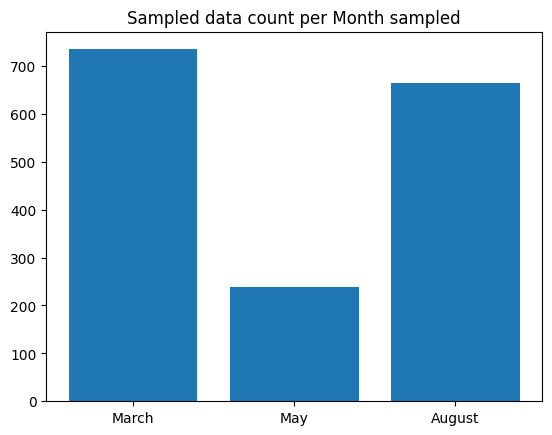

In [24]:
#Here ill put the month data discrepancy into visual data
keys = ['March', 'May', 'August']
values = [df[df['month'] == 3]['id'].count(), df[df['month'] == 5]['id'].count(), df[df['month'] == 8]['id'].count()]

plt.bar(keys, values)
plt.title("Sampled data count per Month sampled")

Text(0.5, 1.0, 'Sampled data per Location sampled')

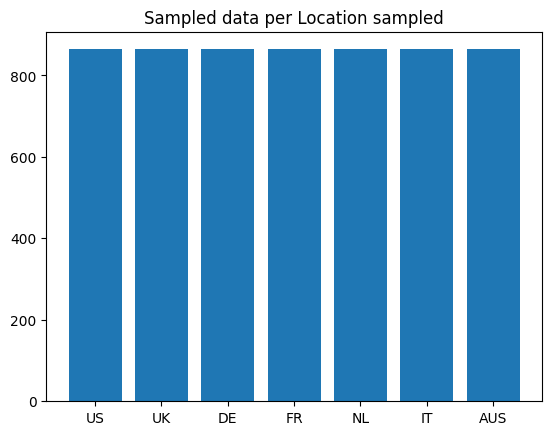

In [ ]:
#Here I will sample the same data but pertaining to the location.
keys = df['kw_location'].unique()
values = []
KwLocations = df['kw_location'].unique()
for i in KwLocations:
    value = df[df['kw_location'] == i]['id'].count()
    values.append(value)

plt.bar(keys, values)
plt.title("Sampled data per Location sampled")

#Surprisingly these columns are all perfectly exact. This means I can give equal value confidence to each.

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
    I did not expect the difference in data volume between months to be so drastic.

2. Do you have any concerns about your dataset? 
    This same surprise is my only cause for concern. It shouldn't pose an issue as there is still enough data for the lesser sampled months, however consistency with data is always a concern, as some analyses may prove more accurate than others as a result.

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
    Remove the time location column, but include the fact the data is sampled in UK time to the final report. Also be sure to note difference in data confidence to final report.

